# Thompson Sampling Intuition

Thompson sampling is yet another popular algorithm for **multi-armed bandit problems like UCB**. But the implementation greatly differs from each other. It provides a **probabilistic approach** to balancing the exploration-exploitation trade-off by using Bayesian inference. Thompson sampling uses a **probabilistic approach** while the upper confidence bound uses a **deterministic approach**. Here's an explanation of Thompson Sampling and the intuition behind it:

As with the UCB algorithm, the multi-armed bandit problem involves selecting from multiple options (arms), each providing a random reward from an unknown distribution. The goal is to maximize the total reward over a series of rounds.

Thompson Sampling uses a **Bayesian approach** to model the uncertainty of the reward distributions. The key idea is to maintain a probability distribution (posterior) for the expected reward of each arm and sample from these distributions to make decisions.

**Intuition Behind Thompson Sampling** - The intuition behind Thompson Sampling is that it uses probability distributions to model uncertainty and guide decision-making:

**Exploration:** By sampling from the posterior distributions, Thompson Sampling naturally explores arms that are less certain because the posterior distributions for these arms are wider, leading to more variability in the samples.

**Exploitation:** Arms that have consistently provided higher rewards will have posterior distributions with higher means, leading to higher sampled values and more frequent selection.

This approach ensures that each arm is explored proportionally to the uncertainty and the observed rewards, leading to an efficient balance between exploration and exploitation.

Below are the steps followed in thompson sampling to implement.

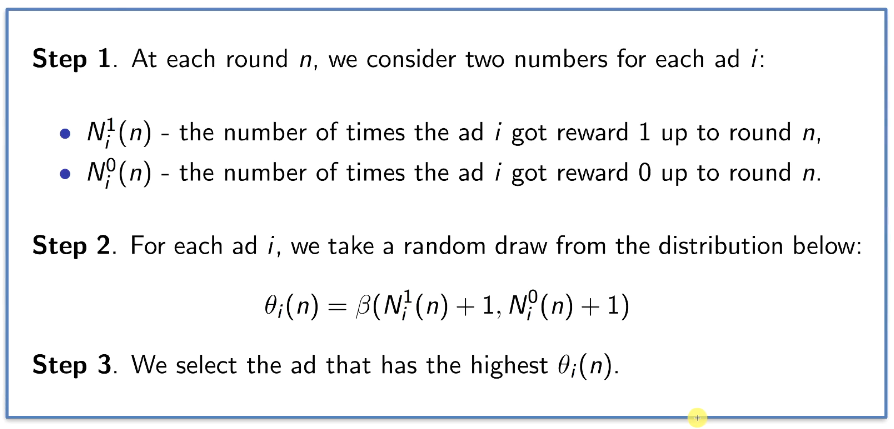

# Importing required libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing dataset

In [14]:
df = pd.read_csv('/kaggle/input/ads-ctr-optimization/Ads_CTR_Optimisation.csv')

# Implementing Thompson Sampling

In [15]:
"""Since we use beta distribution, we need to import random module

Next as usual N = 10000. where N is the no.of times the ad was selected

Next, d is the no of ads that the users will click

Next, ads_selected is the variable where all the ads that are selected will be appended in the second for loop

Next, 'numbers_of_rewards1' is the no.of times each ad gets reward 1. Initially it will be assigned with 10 zeros.
Because, initially there wouldn't be any ad selected.

Next, 'numbers_of_rewards0' is the no.of times each ad gets reward 0. Initially it will be assigned with 10 zeros.
Because, initially there wouldn't be any ad selected.

Next we will introduce a new variable called 'ad' with 0. And this is the ad which will be the ad that we select at
each round N

Next, the first for loop that has the values from 0 to 10000. The range is chosen as 0 to N since N is assigned as 10000

Next, max_random - It's exactly the maximum random draws. We select the ad that has highest of these random draws
taken from the beta distributions and still there is a maximum value to consider. It will be initially assigned with 0

Next, the second for loop for the iteration of all the ads. The range is chose as 0 to d, since d is assigned with 10

Next, we will implement the step2 of diagram here. random_beta = beta(numbers_of_rewards1 + numbers_of_rewards0).
The random draw from the beta distribution of any parameters. This is achieved by a method called 'betavariate' of
random module. It expects 2 parameters. They are Alpha and Beta. which is exactly our numbers_of_rewards1[i] and
numbers_of_rewards0[i]. Don't forget to mention the element of index(i) since both these variables are assigned as list.

Once, the step2 is implemented, then step3. We need to figure out the trick to select the ad that has the highest
random draw among all these random draw taken from the different beta distributions for each of the ads. For that, we
will check whether random_beta is greater than max_beta. If yes, then update the old(previous) highest random_beta to
max_random. and in the same if loop, update the element of index(i) which is the no.of ads to the already created
variable 'ad'.

Next, since there is no else part required, we will come out of the if loop and then start updating all the initial
variables with the latest values. 'ads_selected' is appended with the latest value 'ad'.

Next, same like in UCB algorithm, we will initialize a variable called reward. This is nothing but the value we are
trying to get the value for a particular user(n) against the particular ad(ad) and we will get this from our dataset.
So the value would be df.values[i, ad].

Then, we will check whether that value from dataset has got 1 or 0. If 1, we will increment the 'numbers_of_rewards1'
variable by 1. If the value is 0, then we will increment the 'numbers_of_rewards0' variable by 1.

Finally, in the same first loop inside, we will update the total_reward variable to rewards."""

import random
N = 100
d = 10
ads_selected = []
numbers_of_rewards1 = [1] * d
numbers_of_rewards0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards1[i] + 1, numbers_of_rewards0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    rewards = df.values[n, ad]
    if numbers_of_rewards1 == 1:
        numbers_of_rewards1[ad] =+ 1
    else:
        numbers_of_rewards0[ad] =+ 1
    total_reward =+ rewards

# Visualizing Thompson Sampling

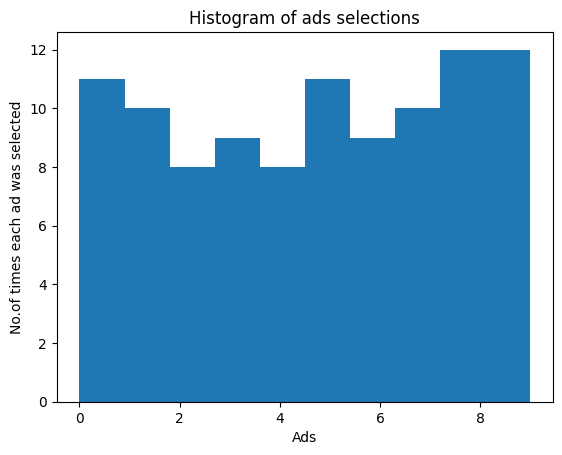

In [16]:
"""Like in UCB, we will visualize the thompson sampling algorithm using histogram"""

plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('No.of times each ad was selected')
plt.show()